# Breast Cancer Dataset

In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
data = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=20)

In [4]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(30),
    tf.keras.layers.Dense(40, activation= 'relu'),
    tf.keras.layers.Dense(40, activation= 'relu'),
    tf.keras.layers.Dense(20, activation= 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
from keras.engine.training import optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
r = model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=50)

Epoch 1/50
12/12 [==============================] - 1s 28ms/step - loss: 0.5421 - accuracy: 0.7900 - val_loss: 0.4055 - val_accuracy: 0.9149
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.3410 - accuracy: 0.9396 - val_loss: 0.2727 - val_accuracy: 0.9309
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2253 - accuracy: 0.9528 - val_loss: 0.1924 - val_accuracy: 0.9468
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1636 - accuracy: 0.9528 - val_loss: 0.1462 - val_accuracy: 0.9468
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1285 - accuracy: 0.9580 - val_loss: 0.1150 - val_accuracy: 0.9574
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1076 - accuracy: 0.9633 - val_loss: 0.0958 - val_accuracy: 0.9681
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0938 - accuracy: 0.9764 - val_loss: 0.0816 - val_accuracy: 0.9681
Epoch 8/50
12/12 [=

In [8]:
import matplotlib.pyplot as plt

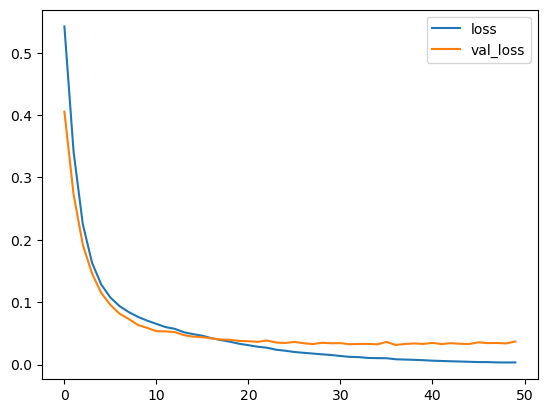

In [9]:
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()

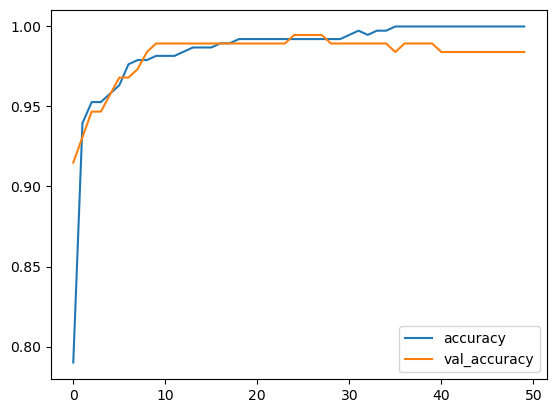

In [10]:
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

In [11]:
print('Train Score: ', model.evaluate(X_train, y_train)[1])
print('Test Score: ', model.evaluate(X_test, y_test)[1])

12/12 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Train Score:  1.0
6/6 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9840
Test Score:  0.9840425252914429
